# Moving averages


In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint

from utils import get_data, get_return_simulation
from strategies import sma, ema


In [2]:
weights = [0.5, 0.4, 0.023, 0.033, 0.043]

## Get stocks data


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

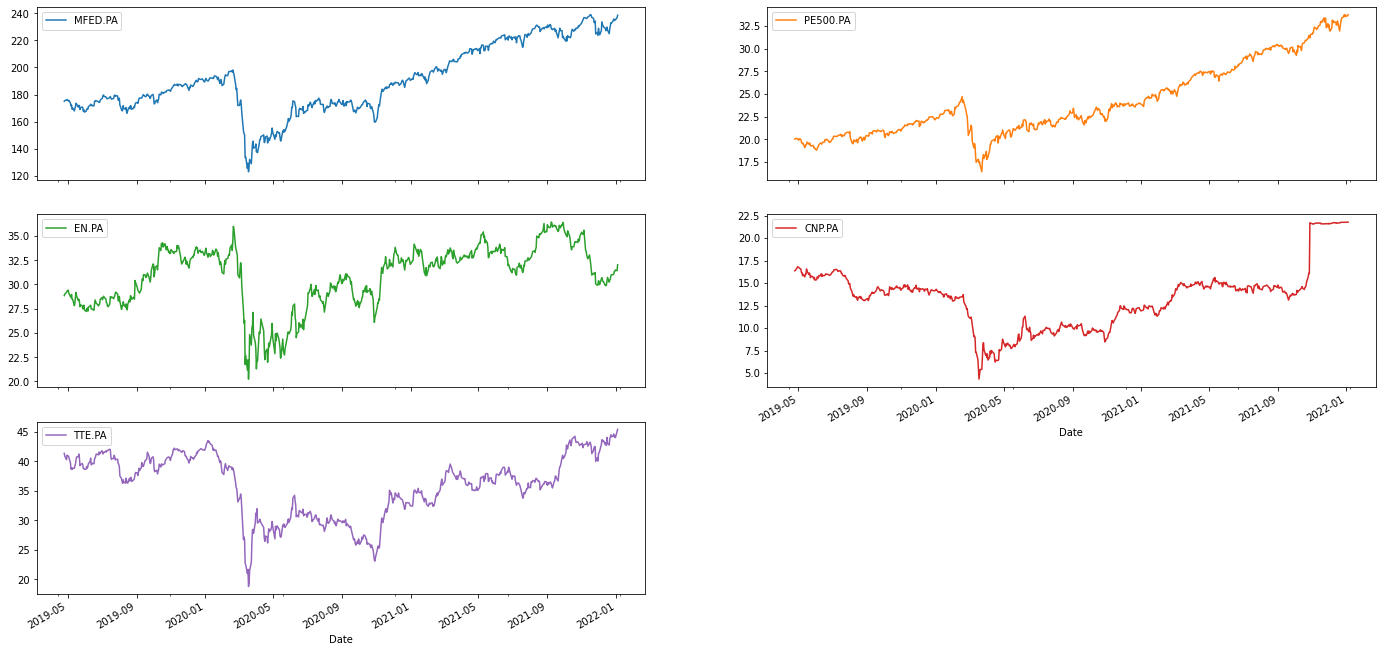

In [3]:
df, stocks = get_data('stocks')

df.plot(figsize=(24, 12), subplots=True, layout=(3, 2))


## Example of a strategy base on 2 simple moving averages


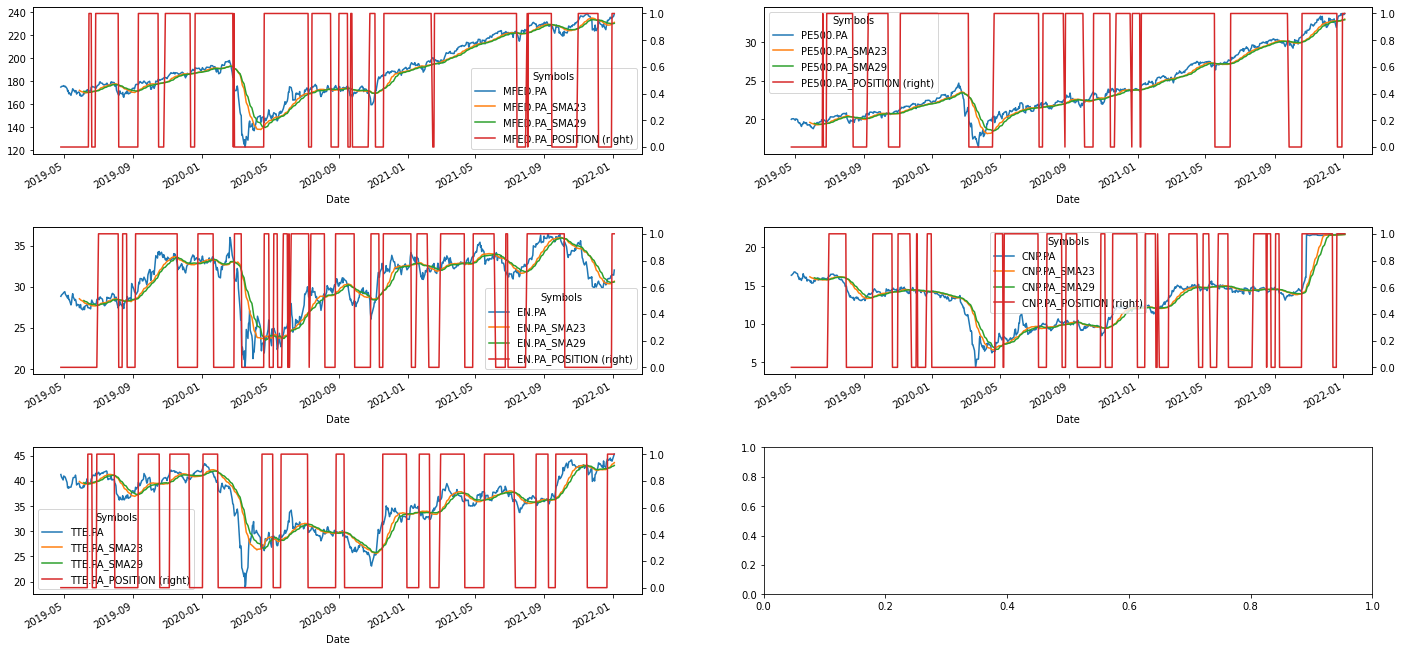

In [4]:
SMA1 = 23
SMA2 = 29

fig, axes = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

df = sma(df, stocks, SMA1, SMA2)

for i, s in enumerate(stocks):
    df[[s, f"{s}_SMA{SMA1}", f"{s}_SMA{SMA2}", f"{s}_POSITION"]].plot(
        figsize=(24, 12), ax=axes[i // 2, i % 2], secondary_y=f"{s}_POSITION"
    )


## Compute strategy returns and compare to stock returns


{'CNP.PA': {'amount invested': 292.20573472976685,
            'base returns': 1.3298480382757274,
            'strategy returns': 1.6382977749499783},
 'EN.PA': {'amount invested': 618.6445198059082,
           'base returns': 1.1104018010879106,
           'strategy returns': 1.087264095665575},
 'MFED.PA': {'amount invested': 3382.019973754883,
             'base returns': 1.3635583823033623,
             'strategy returns': 1.2701580485840307},
 'PE500.PA': {'amount invested': 353.8770008087158,
              'base returns': 1.6872499465942383,
              'strategy returns': 1.4303698257346726},
 'TTE.PA': {'amount invested': 592.129545211792,
            'base returns': 1.0982800084327706,
            'strategy returns': 1.2259479176140597}}


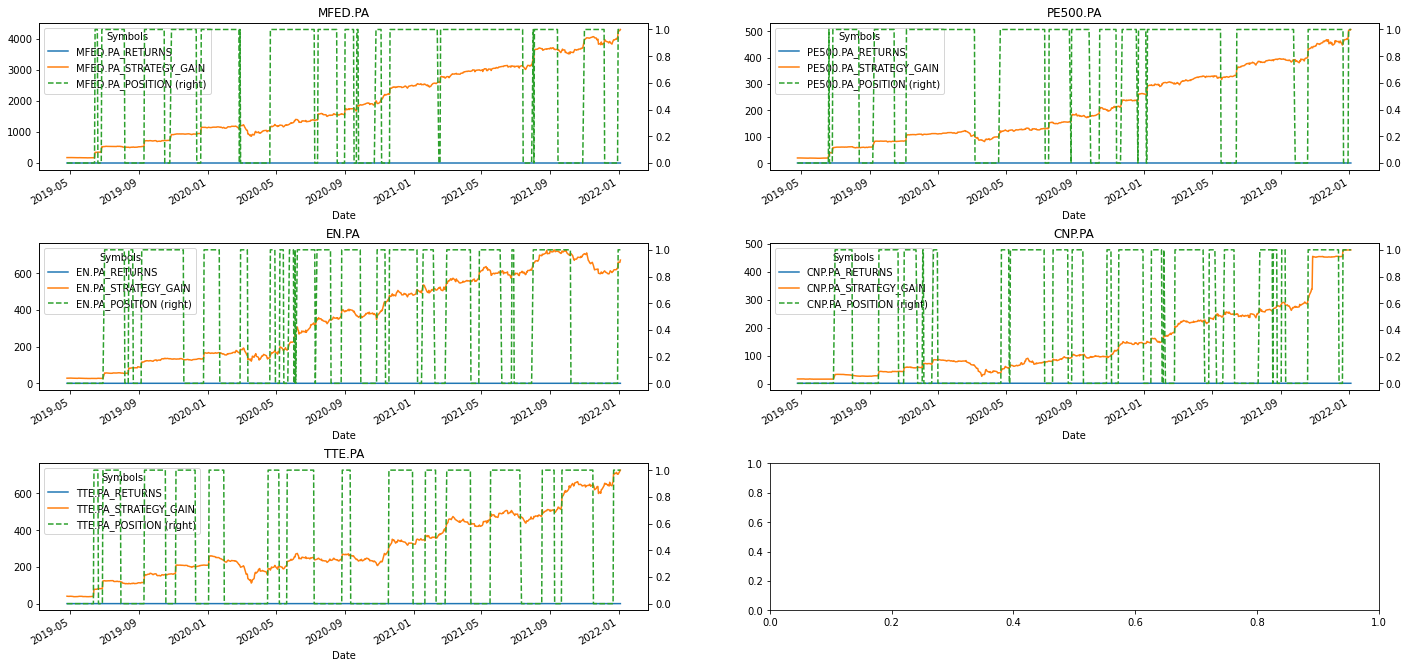

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)


pprint.pprint(get_return_simulation(df, stocks))

for i, s in enumerate(stocks):
    ax = df[[f"{s}_RETURNS", f"{s}_STRATEGY_GAIN"]].plot(
        figsize=(24, 12), ax=axes[i // 2, i % 2]
    )
    df[[f"{s}_POSITION"]].plot(
        figsize=(24, 12), ax=ax, secondary_y=f"{s}_POSITION", style="--"
    )
    plt.title(s)


## Compute best simple moving average pair


In [6]:
symbols = stocks[:]
results = pd.DataFrame()

data = pd.DataFrame(df[symbols])
data.dropna(inplace=True)

for SMA1 in range(2, 31):
    for SMA2 in range(SMA1 + 1, 51):
        data = sma(data, symbols, SMA1, SMA2)

        return_simulation = get_return_simulation(data, symbols)
        market = sum(
            [w * return_simulation[s]["base returns"] for s, w in zip(symbols, weights)]
        )
        strategy = sum(
            [
                w * return_simulation[s]["strategy returns"]
                for s, w in zip(symbols, weights)
            ]
        )

        results = results.append(
            pd.DataFrame(
                {
                    "SMA1": SMA1,
                    "SMA2": SMA2,
                    "market": market,
                    "strategy": strategy,
                    "out": strategy - market,
                },
                index=[0],
            ),
            ignore_index=True,
        )

results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      986 non-null    int64  
 1   SMA2      986 non-null    int64  
 2   market    986 non-null    float64
 3   strategy  986 non-null    float64
 4   out       986 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 38.6 KB


In [7]:
results.sort_values("out", ascending=False).head(7)


,SMA1,SMA2,market,strategy,out
928,28,34,1.473329,1.376724,-0.096605
906,27,34,1.473329,1.374270,-0.099059
882,26,33,1.473329,1.373994,-0.099336
174,5,39,1.473329,1.372408,-0.100921
173,5,38,1.473329,1.372148,-0.101181
896,26,47,1.473329,1.372006,-0.101323
872,25,47,1.473329,1.370549,-0.102780


## Exponential moving averages


In [8]:
symbols = stocks[:]
results = pd.DataFrame()

data = pd.DataFrame(df[symbols])
data.dropna(inplace=True)

for EMA1 in range(2, 31):
    for EMA2 in range(EMA1 + 1, 51):
        data = ema(data, symbols, EMA1, EMA2)

        return_simulation = get_return_simulation(data, symbols)
        market = sum(
            [w * return_simulation[s]["base returns"] for s, w in zip(symbols, weights)]
        )
        strategy = sum(
            [
                w * return_simulation[s]["strategy returns"]
                for s, w in zip(symbols, weights)
            ]
        )

        results = results.append(
            pd.DataFrame(
                {
                    "EMA1": EMA1,
                    "EMA2": EMA2,
                    "market": market,
                    "strategy": strategy,
                    "out": strategy - market,
                },
                index=[0],
            ),
            ignore_index=True,
        )

results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EMA1      986 non-null    int64  
 1   EMA2      986 non-null    int64  
 2   market    986 non-null    float64
 3   strategy  986 non-null    float64
 4   out       986 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 38.6 KB


In [9]:
results.sort_values("out", ascending=False).head(10)


,EMA1,EMA2,market,strategy,out
140,4,50,1.473329,1.476418,0.003089
227,6,48,1.473329,1.475163,0.001833
183,5,48,1.473329,1.474601,0.001271
266,7,44,1.473329,1.474528,0.001198
229,6,50,1.473329,1.474494,0.001164
228,6,49,1.473329,1.474234,0.000905
307,8,43,1.473329,1.474101,0.000772
269,7,47,1.473329,1.474058,0.000728
267,7,45,1.473329,1.473649,0.000320
185,5,50,1.473329,1.473091,-0.000239


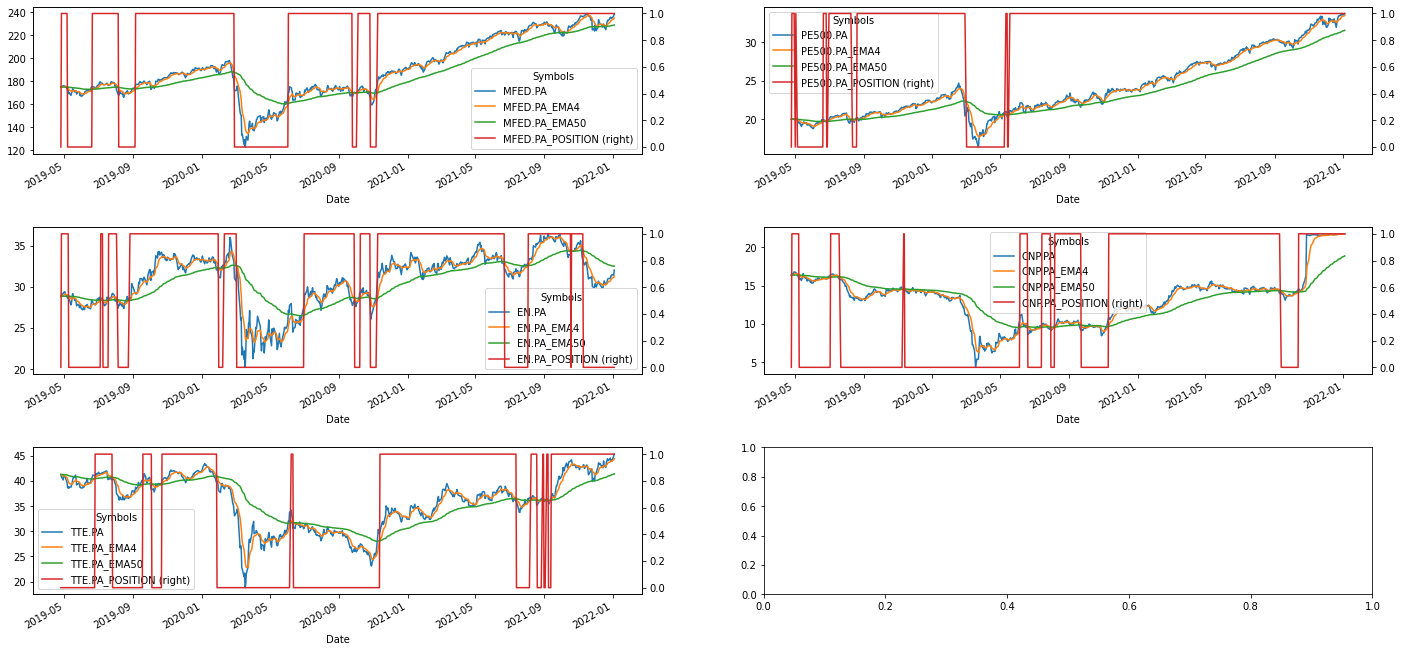

In [11]:
EMA1 = 4
EMA2 = 50

fig, axes = plt.subplots(nrows=3, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

df = ema(df, stocks, EMA1, EMA2)

for i, s in enumerate(stocks):
    df[[s, f"{s}_EMA{EMA1}", f"{s}_EMA{EMA2}", f"{s}_POSITION"]].plot(
        figsize=(24, 12), ax=axes[i // 2, i % 2], secondary_y=f"{s}_POSITION"
    )


## Conclusion

- We did not find a SMA pair that consistently have higher returns than staying in the market
- In the method to find the best pair, all stocks were equally weighted
- SMA cannot be used for buy/sell signals by itself
- EMA produce more profitable signals than SMA

- Try with 3 SMA to generate signal